# 📊 IPL 2025 – Exploratory Data Analysis (EDA)

**Author:** Shaik Anas  
**Tools:** Python, Pandas, NumPy, Matplotlib, Seaborn


## Introduction
This notebook performs an exploratory data analysis (EDA) on IPL 2025 batting and bowling datasets to understand structure, quality, and patterns.


## Objectives
- Dataset understanding
- Data quality checks
- All-rounder identification
- Preparation for analysis


## Questions Explored
1. Strike rate vs economy for all-rounders
2. Team with highest runs
3. Team with highest wickets
4. Top 10 all-rounders
5. Runs vs wickets relationship


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10,6)

In [13]:
batting_df = pd.read_csv('/content/IPL2025Batters.csv')
bowling_df = pd.read_csv('/content/IPL2025Bowlers.csv')
print('Datasets Loaded Successfully')

Datasets Loaded Successfully


In [5]:
batting_df.shape, bowling_df.shape

((156, 14), (108, 13))

In [6]:
display(batting_df.head(10))
display(bowling_df.head(10))

,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,1,6,88,21
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,0,5,69,38
2,Virat Kohli,RCB,657,15,15,3,73*,54.75,454,144.71,0,8,66,19
3,Shubman Gill,GT,650,15,15,2,93*,50.00,417,155.87,0,6,62,24
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37
5,Shreyas Iyer,PBKS,604,17,17,5,97*,50.33,345,175.07,0,6,43,39
6,Yashasvi Jaiswal,RR,559,14,14,1,75,43.00,350,159.71,0,6,60,28
7,Prabhsimran Singh,PBKS,549,17,17,0,91,32.29,342,160.52,0,4,56,30
8,K L Rahul,DC,539,13,13,3,112*,53.90,360,149.72,1,3,52,21
9,Jos Buttler,GT,538,14,13,4,97*,59.78,330,163.03,0,5,52,24


,Player Name,Team,WKT,MAT,INN,OVR,RUNS,BBI,AVG,ECO,SR,4W,5W
0,Prasidh Krishna,GT,25,15,15,59.0,488,41/4,19.52,8.27,14.16,1,0
1,Noor Ahmad,CSK,24,14,14,50.0,408,18/4,17.00,8.16,12.50,2,0
2,Josh Hazlewood,RCB,22,12,12,44.0,386,33/4,17.54,8.77,12.00,1,0
3,Trent Boult,MI,22,16,16,57.4,517,26/4,23.50,8.96,15.72,1,0
4,Arshdeep Singh,PBKS,21,17,16,58.2,518,16/3,24.66,8.88,16.66,0,0
5,Sai Kishore,GT,19,15,15,42.3,393,30/3,20.68,9.24,13.42,0,0
6,Jasprit Bumrah,MI,18,12,12,47.2,316,22/4,17.55,6.67,15.77,1,0
7,Varun Chakaravarthy,KKR,17,13,13,50.0,383,22/3,22.52,7.66,17.64,0,0
8,Krunal Pandya,RCB,17,15,15,46.0,379,45/4,22.29,8.23,16.23,1,0
9,Bhuvneshwar Kumar,RCB,17,14,14,52.0,483,33/3,28.41,9.28,18.35,0,0


In [7]:
batting_df.info()
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player Name  156 non-null    object 
 1   Team         156 non-null    object 
 2   Runs         156 non-null    int64  
 3   Matches      156 non-null    int64  
 4   Inn          156 non-null    int64  
 5   No           156 non-null    int64  
 6   HS           156 non-null    object 
 7   AVG          156 non-null    object 
 8   BF           156 non-null    int64  
 9   SR           156 non-null    float64
 10  100s         156 non-null    int64  
 11  50s          156 non-null    int64  
 12  4s           156 non-null    int64  
 13  6s           156 non-null    int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 17.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------  

In [8]:
batting_df.isnull().sum(), bowling_df.isnull().sum()

(Player Name    0
 Team           0
 Runs           0
 Matches        0
 Inn            0
 No             0
 HS             0
 AVG            0
 BF             0
 SR             0
 100s           0
 50s            0
 4s             0
 6s             0
 dtype: int64,
 Player Name    0
 Team           0
 WKT            0
 MAT            0
 INN            0
 OVR            0
 RUNS           0
 BBI            0
 AVG            0
 ECO            0
 SR             0
 4W             0
 5W             0
 dtype: int64)

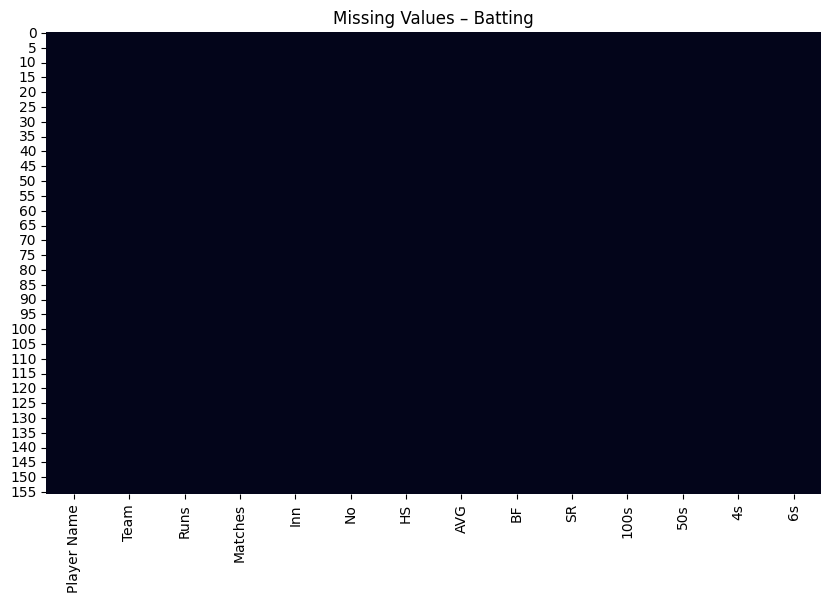

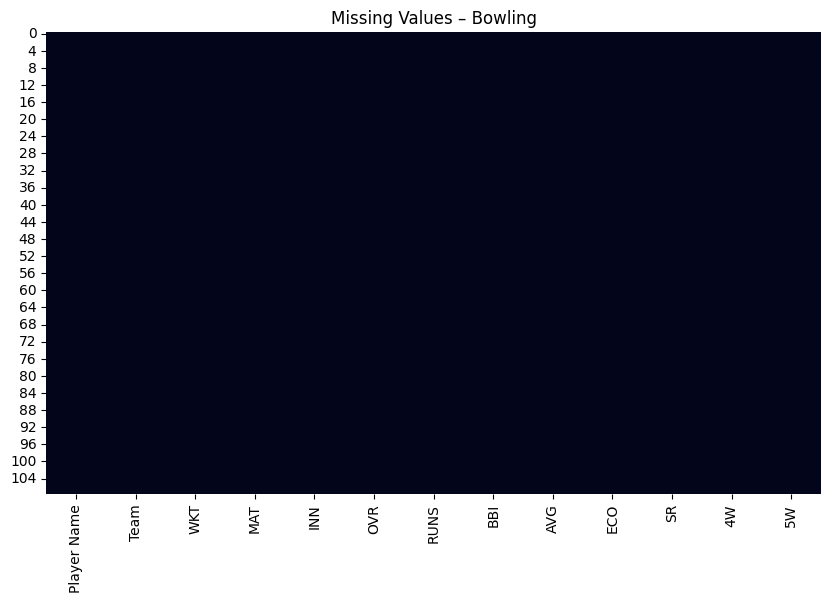

In [9]:
sns.heatmap(batting_df.isnull(), cbar=False)
plt.title('Missing Values – Batting')
plt.show()

sns.heatmap(bowling_df.isnull(), cbar=False)
plt.title('Missing Values – Bowling')
plt.show()

In [10]:
batting_df.describe(), bowling_df.describe()

(             Runs     Matches         Inn          No          BF          SR  \
 count  156.000000  156.000000  156.000000  156.000000  156.000000  156.000000   
 mean   161.320513    9.865385    7.153846    1.634615  105.673077  134.394103   
 std    180.352772    4.757455    4.810142    1.658163  112.191838   57.237148   
 min      1.000000    1.000000    1.000000    0.000000    1.000000   25.000000   
 25%     10.750000    6.000000    2.750000    0.000000   12.000000  100.000000   
 50%     93.500000   11.000000    6.000000    1.000000   63.500000  140.005000   
 75%    254.250000   14.000000   12.000000    3.000000  164.750000  162.707500   
 max    759.000000   17.000000   17.000000    7.000000  486.000000  400.000000   
 
              100s         50s          4s          6s  
 count  156.000000  156.000000  156.000000  156.000000  
 mean     0.057692    0.916667   14.391026    8.294872  
 std      0.233912    1.590124   17.778774    9.515500  
 min      0.000000    0.000000  

In [11]:
all_rounders = pd.merge(batting_df, bowling_df, on='Player Name', how='inner')
print('All-Rounders:', all_rounders.shape[0])
display(all_rounders.head())

All-Rounders: 71


,Player Name,Team_x,Runs,Matches,Inn,No,HS,AVG_x,BF,SR_x,...,MAT,INN,OVR,RUNS,BBI,AVG_y,ECO,SR_y,4W,5W
0,Aiden Markram,LSG,445,13,13,0,66,34.23,299,148.82,...,13,5,11.0,102,30/2,25.50,9.27,16.5,0,0
1,Riyan Parag,RR,393,14,14,2,95,32.75,236,166.52,...,14,9,20.0,170,1-Dec,56.66,8.50,40.0,0,0
2,Ayush Badoni,LSG,329,14,11,1,74,32.90,222,148.19,...,14,2,1.4,13,2-Apr,6.50,7.80,5.0,0,0
3,Ravindra Jadeja,CSK,301,14,14,5,77*,33.44,222,135.58,...,14,14,37.5,324,17/2,32.40,8.56,22.7,0,0
4,Axar Patel,DC,263,12,11,1,43,26.30,167,157.48,...,12,11,34.0,288,19/2,57.60,8.47,40.8,0,0


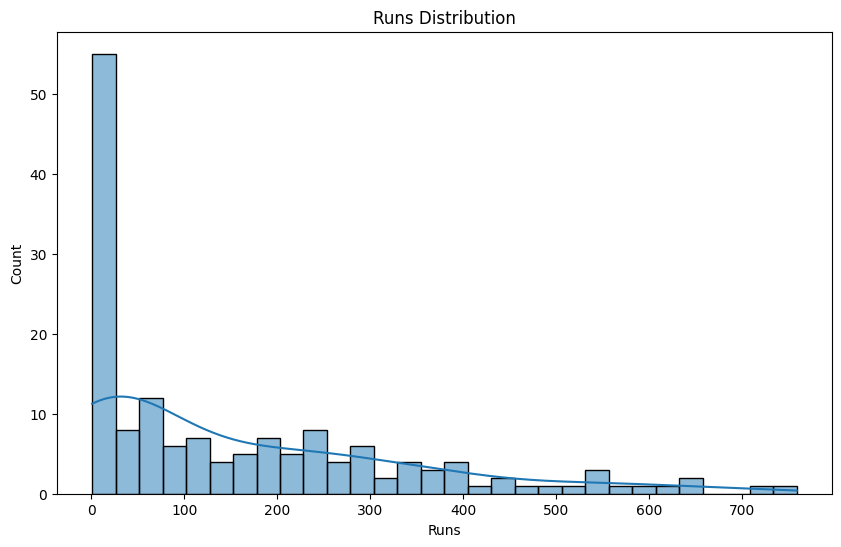

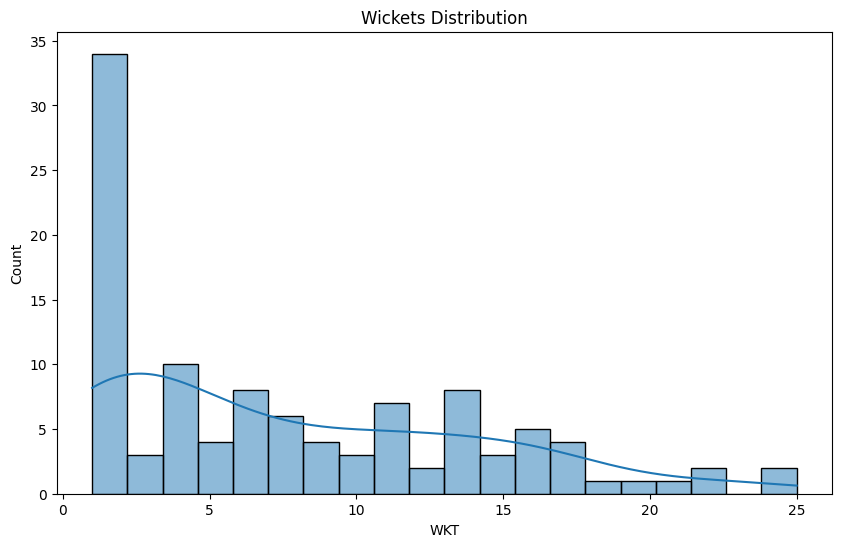

In [14]:
sns.histplot(batting_df['Runs'], bins=30, kde=True)
plt.title('Runs Distribution')
plt.show()

sns.histplot(bowling_df['WKT'], bins=20, kde=True)
plt.title('Wickets Distribution')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=all_rounders, x='SR_x', y='ECO_y', hue='Team_x', size='Runs', sizes=(20, 1000), alpha=0.7)
plt.title('All-Rounders: Batting Strike Rate vs Bowling Economy')
plt.xlabel('Batting Strike Rate (SR)')
plt.ylabel('Bowling Economy (ECO)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axvline(x=all_rounders['SR_x'].mean(), color='r', linestyle='--', label=f'Avg Batting SR: {all_rounders["SR_x"].mean():.2f}')
plt.axhline(y=all_rounders['ECO_y'].mean(), color='g', linestyle='--', label=f'Avg Bowling ECO: {all_rounders["ECO_y"].mean():.2f}')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
output_file = 'all_rounders_updated.csv'
all_rounders.to_csv(output_file, index=False)
print(f'DataFrame saved to {output_file}')

## Conclusion
The dataset is clean and ready for further IPL 2025 analysis.